# Importing the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('/content/drive/MyDrive/elevvo/Task 2/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().values.any()

np.False_

In [9]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


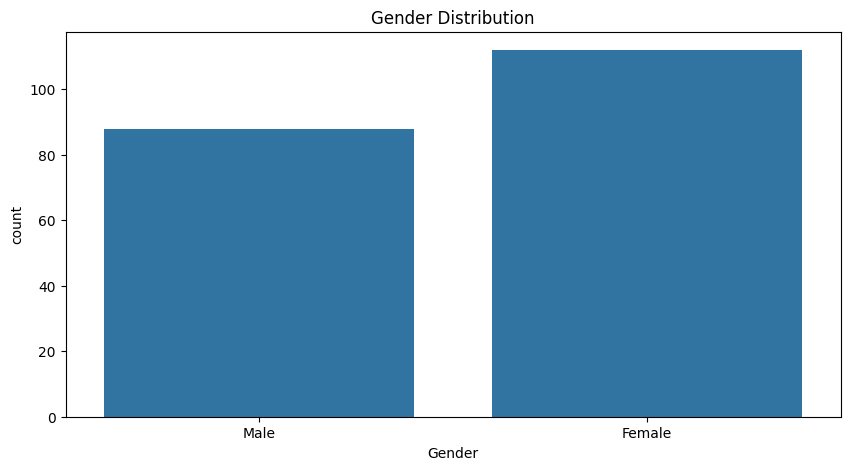

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x='Gender')
plt.title('Gender Distribution')
plt.show()

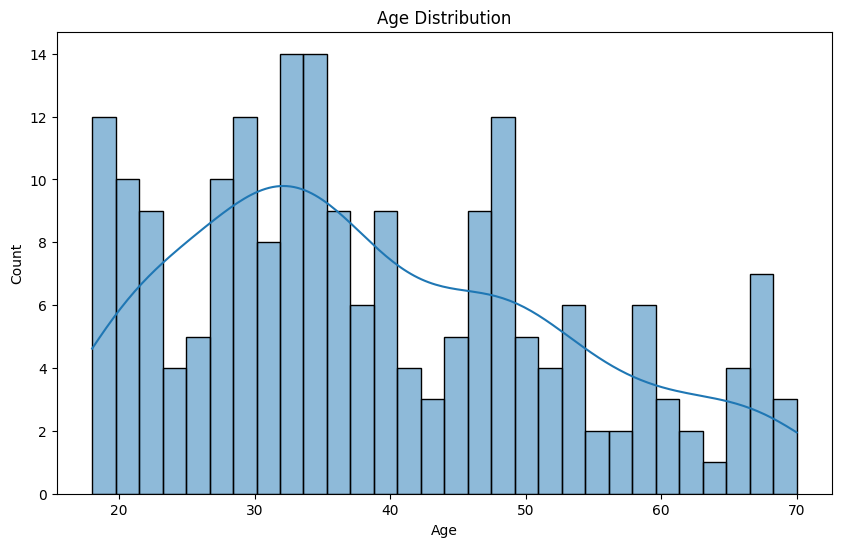

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'],bins=30,kde=True)
plt.title('Age Distribution')
plt.show()

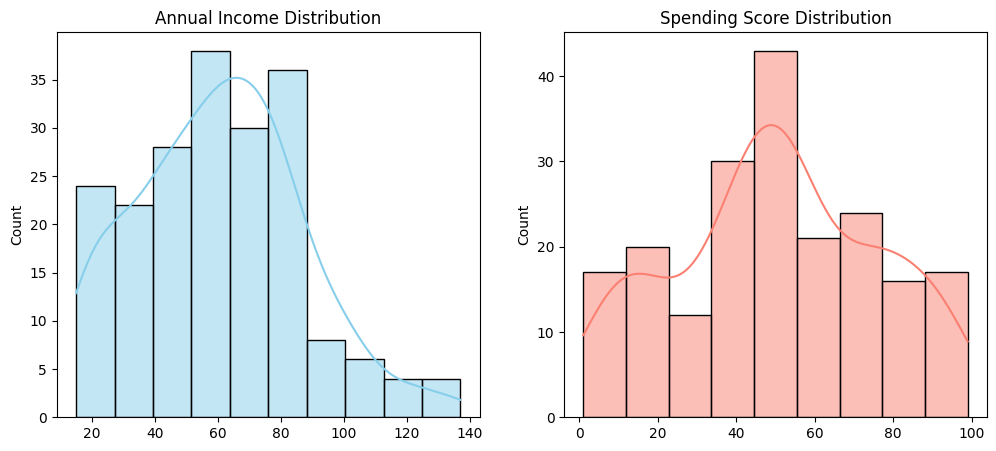

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(X[:,0], kde=True, color='skyblue')
plt.title('Annual Income Distribution')

plt.subplot(1,2,2)
sns.histplot(X[:,1], kde=True, color='salmon')
plt.title('Spending Score Distribution')
plt.show()

In [18]:
X = df[['Annual Income (k$)','Spending Score (1-100)']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

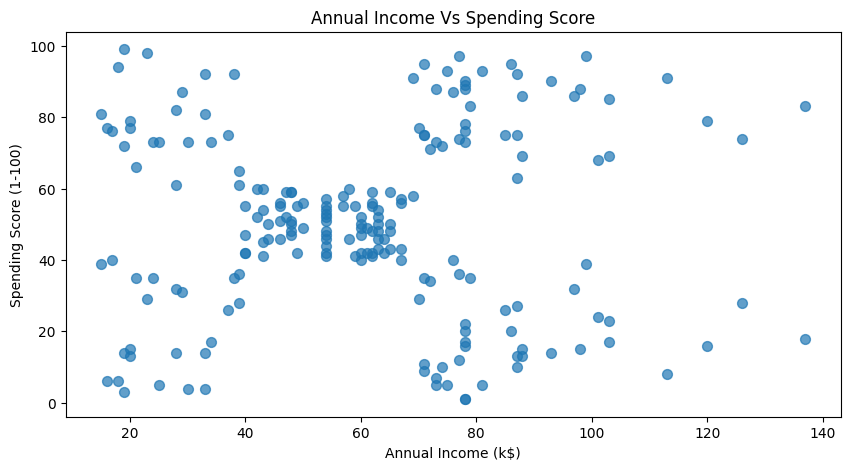

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],s=50,alpha=0.7)
plt.title('Annual Income Vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()